In [3]:
import numpy as np
import math as math
import pandas as pd
import datetime as dt
import pandas_datareader as web
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, GRU
import json
from datetime import datetime

In [5]:
df = pd.read_json('https://nepsealpha.com/trading/1/history?symbol=PLI&resolution=1D&from=1622246400&to=1654560000&pass=ok&force=6646&currencyCode=NRS')
df

,t,c,o,h,l,v,s
0,1614124800,819.0,800.0,844.0,800.0,24746,ok
1,1614211200,809.0,810.0,830.0,806.0,31374,ok
2,1614470400,788.0,809.0,810.0,785.0,37966,ok
3,1614556800,791.0,781.0,811.0,763.0,25488,ok
4,1614643200,772.0,791.0,800.0,761.0,24210,ok
...,...,...,...,...,...,...,...
297,1653922770,434.0,445.0,449.9,413.6,6298,ok
298,1654009170,439.0,427.0,441.0,402.0,5540,ok
299,1654095600,443.7,439.0,443.7,406.8,10008,ok
300,1654182000,415.0,434.9,434.9,403.0,10674,ok


In [6]:
df1 = df[['t']].astype('datetime64[s]')
df1

,t
0,2021-02-24 00:00:00
1,2021-02-25 00:00:00
2,2021-02-28 00:00:00
3,2021-03-01 00:00:00
4,2021-03-02 00:00:00
...,...
297,2022-05-30 14:59:30
298,2022-05-31 14:59:30
299,2022-06-01 15:00:00
300,2022-06-02 15:00:00


In [7]:
df['t']=df1['t']
df

,t,c,o,h,l,v,s
0,2021-02-24 00:00:00,819.0,800.0,844.0,800.0,24746,ok
1,2021-02-25 00:00:00,809.0,810.0,830.0,806.0,31374,ok
2,2021-02-28 00:00:00,788.0,809.0,810.0,785.0,37966,ok
3,2021-03-01 00:00:00,791.0,781.0,811.0,763.0,25488,ok
4,2021-03-02 00:00:00,772.0,791.0,800.0,761.0,24210,ok
...,...,...,...,...,...,...,...
297,2022-05-30 14:59:30,434.0,445.0,449.9,413.6,6298,ok
298,2022-05-31 14:59:30,439.0,427.0,441.0,402.0,5540,ok
299,2022-06-01 15:00:00,443.7,439.0,443.7,406.8,10008,ok
300,2022-06-02 15:00:00,415.0,434.9,434.9,403.0,10674,ok


In [8]:
df2 = df.set_index('t')
df2

,c,o,h,l,v,s
t,,,,,,
2021-02-24 00:00:00,819.0,800.0,844.0,800.0,24746,ok
2021-02-25 00:00:00,809.0,810.0,830.0,806.0,31374,ok
2021-02-28 00:00:00,788.0,809.0,810.0,785.0,37966,ok
2021-03-01 00:00:00,791.0,781.0,811.0,763.0,25488,ok
2021-03-02 00:00:00,772.0,791.0,800.0,761.0,24210,ok
...,...,...,...,...,...,...
2022-05-30 14:59:30,434.0,445.0,449.9,413.6,6298,ok
2022-05-31 14:59:30,439.0,427.0,441.0,402.0,5540,ok
2022-06-01 15:00:00,443.7,439.0,443.7,406.8,10008,ok


In [9]:
df3=df2[['c']]
df3

,c
t,
2021-02-24 00:00:00,819.0
2021-02-25 00:00:00,809.0
2021-02-28 00:00:00,788.0
2021-03-01 00:00:00,791.0
2021-03-02 00:00:00,772.0
...,...
2022-05-30 14:59:30,434.0
2022-05-31 14:59:30,439.0
2022-06-01 15:00:00,443.7


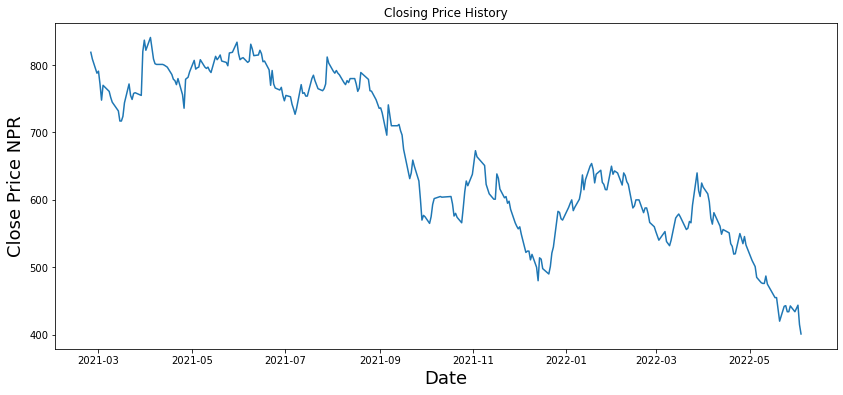

In [10]:
plt.figure(figsize=(14,6))
plt.title('Closing Price History')
plt.plot(df3['c'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price NPR', fontsize=18)
plt.show()

In [11]:
data = df3.filter(['c'])
dataset = data.values
training_data_len = math.ceil( len(dataset) * .7 )
training_data_len

212

In [12]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.95      ],
       [0.92727273],
       [0.87954545],
       [0.88636364],
       [0.84318182],
       [0.78863636],
       [0.83863636],
       [0.81818182],
       [0.79772727],
       [0.78181818],
       [0.75227273],
       [0.71818182],
       [0.71818182],
       [0.73409091],
       [0.77954545],
       [0.84318182],
       [0.80454545],
       [0.79090909],
       [0.81136364],
       [0.81363636],
       [0.80454545],
       [0.95227273],
       [0.99090909],
       [0.95681818],
       [1.        ],
       [0.96363636],
       [0.92727273],
       [0.91136364],
       [0.90909091],
       [0.90909091],
       [0.90681818],
       [0.9       ],
       [0.875     ],
       [0.85909091],
       [0.85454545],
       [0.84090909],
       [0.86136364],
       [0.80681818],
       [0.76136364],
       [0.85909091],
       [0.86590909],
       [0.88409091],
       [0.92272727],
       [0.89318182],
       [0.89772727],
       [0.9       ],
       [0.925     ],
       [0.9  

In [13]:
train_data = scaled_data[0:training_data_len , :]
x_train = []
y_train = []
for i in range(70, len(train_data)):
    x_train.append(train_data[i-70:i, 0])
    y_train.append(train_data[i, 0])
    if i<=71:
        print(x_train)
        print(y_train)
        print()

[array([0.95      , 0.92727273, 0.87954545, 0.88636364, 0.84318182,
       0.78863636, 0.83863636, 0.81818182, 0.79772727, 0.78181818,
       0.75227273, 0.71818182, 0.71818182, 0.73409091, 0.77954545,
       0.84318182, 0.80454545, 0.79090909, 0.81136364, 0.81363636,
       0.80454545, 0.95227273, 0.99090909, 0.95681818, 1.        ,
       0.96363636, 0.92727273, 0.91136364, 0.90909091, 0.90909091,
       0.90681818, 0.9       , 0.875     , 0.85909091, 0.85454545,
       0.84090909, 0.86136364, 0.80681818, 0.76136364, 0.85909091,
       0.86590909, 0.88409091, 0.92272727, 0.89318182, 0.89772727,
       0.9       , 0.925     , 0.9       , 0.89545455, 0.9       ,
       0.88863636, 0.88181818, 0.93636364, 0.925     , 0.93181818,
       0.94090909, 0.92045455, 0.91590909, 0.90454545, 0.94772727,
       0.95      , 0.98409091, 0.94545455, 0.925     , 0.92954545,
       0.93181818, 0.91590909, 0.92045455, 0.97727273, 0.96136364])]
[0.9386363636363636]

[array([0.95      , 0.92727273, 0.879

In [14]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [15]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(142, 70, 1)

In [16]:
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(100, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [17]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [18]:
model.fit(x_train, y_train, batch_size=1, epochs=50)

Epoch 1/50
142/142 [==============================] - 6s 20ms/step - loss: 0.0183
Epoch 2/50
142/142 [==============================] - 3s 19ms/step - loss: 0.0071
Epoch 3/50
142/142 [==============================] - 2s 16ms/step - loss: 0.0043
Epoch 4/50
142/142 [==============================] - 2s 17ms/step - loss: 0.0048
Epoch 5/50
142/142 [==============================] - 2s 16ms/step - loss: 0.0049
Epoch 6/50
142/142 [==============================] - 2s 17ms/step - loss: 0.0032
Epoch 7/50
142/142 [==============================] - 3s 21ms/step - loss: 0.0038
Epoch 8/50
142/142 [==============================] - 3s 20ms/step - loss: 0.0035
Epoch 9/50
142/142 [==============================] - 3s 19ms/step - loss: 0.0031
Epoch 10/50
142/142 [==============================] - 2s 17ms/step - loss: 0.0030
Epoch 11/50
142/142 [==============================] - 2s 16ms/step - loss: 0.0043
Epoch 12/50
142/142 [==============================] - 2s 17ms/step - loss: 0.0028
Epoch 13/50
1

In [19]:
test_data = scaled_data[training_data_len - 70: , :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(70, len(test_data)):
    x_test.append(test_data[i-70:i, 0])

In [20]:
x_test = np.array(x_test)

In [21]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [22]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

3/3 [==============================] - 1s 27ms/step


In [23]:
rmse = np.sqrt(np.mean(((predictions - y_test)**2)))
rmse

17.869732899711146

<ipython-input-24-0272a400ae15>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


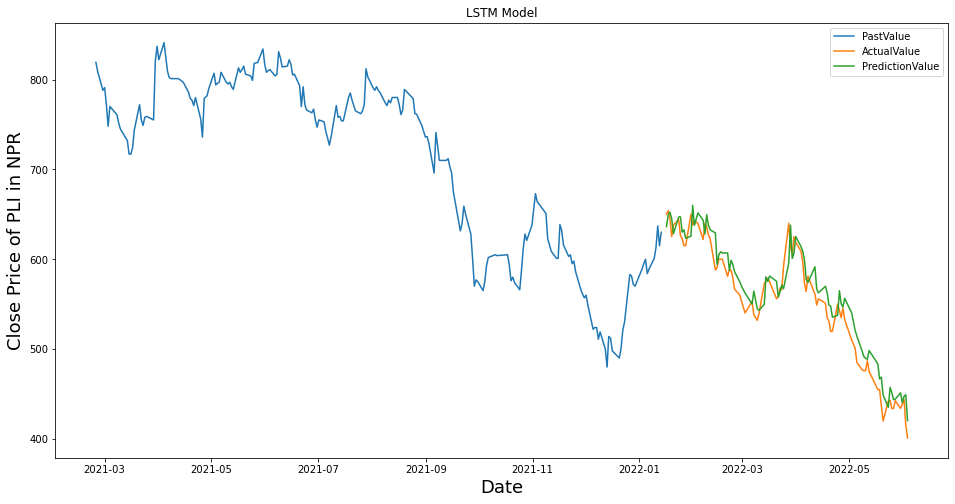

In [24]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
plt.figure (figsize = (16,8))
plt.title('LSTM Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price of PLI in NPR', fontsize=18)
plt.plot(train['c'])
plt.plot(valid[['c','Predictions']])
plt.legend(['PastValue', 'ActualValue', 'PredictionValue'], loc = 'upper right')
plt.show()

In [25]:
new_df = df3.filter(['c'])
last_70_days = new_df[-70:].values
last_70_days_scaled = scaler.transform(last_70_days)
X_test = []
X_test.append(last_70_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

1/1 [==============================] - 0s 24ms/step
[[412.69733]]


In [26]:
df4 = df3.tail(1)
df4

,c
t,
2022-06-03 15:00:00,401.0


In [27]:
df5 = df4.assign(Prediction_of_close_price_for_next_day=pred_price)
df5

,c,Prediction_of_close_price_for_next_day
t,,
2022-06-03 15:00:00,401.0,412.697327


In [28]:
df6 = df5.rename(columns = {'c':"Today's_close_price"})
df6

,Today's_close_price,Prediction_of_close_price_for_next_day
t,,
2022-06-03 15:00:00,401.0,412.697327


In [29]:
model2 = Sequential()
model2.add(GRU(100, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model2.add(GRU(100, return_sequences=False))
model2.add(Dense(25))
model2.add(Dense(1))

In [30]:
model2.compile(optimizer='adam', loss='mean_squared_error')

In [31]:
model2.fit(x_train, y_train, batch_size=1, epochs=50)

Epoch 1/50
142/142 [==============================] - 5s 21ms/step - loss: 0.0130
Epoch 2/50
142/142 [==============================] - 3s 20ms/step - loss: 0.0036
Epoch 3/50
142/142 [==============================] - 2s 17ms/step - loss: 0.0030
Epoch 4/50
142/142 [==============================] - 2s 17ms/step - loss: 0.0030
Epoch 5/50
142/142 [==============================] - 2s 17ms/step - loss: 0.0023
Epoch 6/50
142/142 [==============================] - 3s 19ms/step - loss: 0.0028
Epoch 7/50
142/142 [==============================] - 3s 22ms/step - loss: 0.0021
Epoch 8/50
142/142 [==============================] - 3s 20ms/step - loss: 0.0025
Epoch 9/50
142/142 [==============================] - 3s 19ms/step - loss: 0.0023
Epoch 10/50
142/142 [==============================] - 2s 17ms/step - loss: 0.0018
Epoch 11/50
142/142 [==============================] - 2s 17ms/step - loss: 0.0023
Epoch 12/50
142/142 [==============================] - 2s 17ms/step - loss: 0.0020
Epoch 13/50
1

In [32]:
test_data = scaled_data[training_data_len - 70: , :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(70, len(test_data)):
    x_test.append(test_data[i-70:i, 0])

In [33]:
x_test = np.array(x_test)

In [34]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [35]:
predictions = model2.predict(x_test)
predictions = scaler.inverse_transform(predictions)

3/3 [==============================] - 1s 25ms/step


In [36]:
rmse = np.sqrt(np.mean(((predictions - y_test)**2)))
rmse

17.11369431689365

<ipython-input-37-45d5f9941623>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


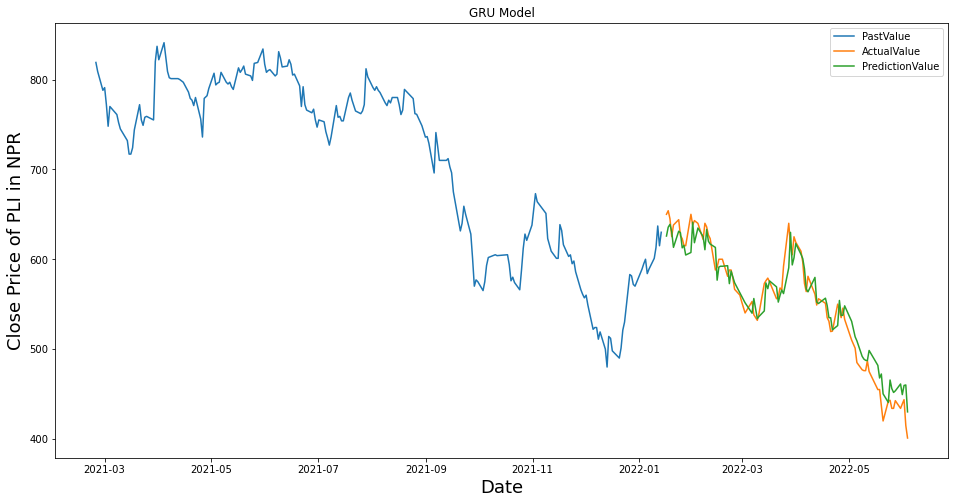

In [37]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
plt.figure (figsize = (16,8))
plt.title('GRU Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price of PLI in NPR', fontsize=18)
plt.plot(train['c'])
plt.plot(valid[['c','Predictions']])
plt.legend(['PastValue', 'ActualValue', 'PredictionValue'], loc = 'upper right')
plt.show()